## Importing Necessary Library

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [95]:
# Select the directory according to your choice
Train_Dir = "Fruit Classification/train"
Val_Dir = "Fruit Classification/validation"
Test_Dir = "Fruit Classification/test"
BATCH_SIZE = 40 #adjust it according to your GPU VRAM
Img_Size = (192, 192)

## Custom Callback Function to Avoid Overfitting

In [78]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Check the loss
        if logs['accuracy'] > 0.90 and logs['val_accuracy'] > 0.90:
            # Stop if threshold is met
            print("\nAccuracy has reached tp 90% so cancelling training!")
            self.model.stop_training = True

## Preparing Dataset

In [98]:
def train_val_dataset():
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=Train_Dir,
        image_size=(Img_Size),
        batch_size= BATCH_SIZE,
        color_mode='rgb',
        shuffle=True
    )

    val_dataset= tf.keras.utils.image_dataset_from_directory(
        directory=Val_Dir,
        image_size= (Img_Size),
        batch_size= BATCH_SIZE,
        color_mode= 'rgb',
    )

    test_dataset= tf.keras.utils.image_dataset_from_directory(
        directory=Test_Dir,
        image_size= (Img_Size),
        batch_size= BATCH_SIZE,
        color_mode= 'rgb',
    )
    
    return train_dataset, val_dataset, test_dataset

train_dataset, val_dataset, test_dataset = train_val_dataset()

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


## Custom CNN Model

In [99]:
def base_model():
    model= tf.keras.Sequential([
        tf.keras.Input(shape=(192,192, 3)),
        tf.keras.layers.Rescaling(1.0/255),
        tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(36)  
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    return model

## Model Summary

In [101]:
custom_model = base_model()
custom_model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_17 (Rescaling)    (None, 192, 192, 3)       0         
                                                                 
 conv2d_77 (Conv2D)          (None, 192, 192, 16)      448       
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 96, 96, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, 96, 96, 32)        4640      
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 48, 48, 64)      

In [102]:
history = custom_model.fit(train_dataset, validation_data=val_dataset, epochs=40, callbacks=[myCallback()])

Epoch 1/40
78/78 [==============================] - 19s 205ms/step - loss: 3.5818 - accuracy: 0.0360 - val_loss: 3.5530 - val_accuracy: 0.0541
Epoch 2/40
78/78 [==============================] - 17s 198ms/step - loss: 3.5004 - accuracy: 0.0652 - val_loss: 3.3909 - val_accuracy: 0.0570
Epoch 3/40
78/78 [==============================] - 17s 197ms/step - loss: 3.3265 - accuracy: 0.0931 - val_loss: 3.0647 - val_accuracy: 0.1538
Epoch 4/40
78/78 [==============================] - 17s 196ms/step - loss: 3.0575 - accuracy: 0.1596 - val_loss: 2.6326 - val_accuracy: 0.2764
Epoch 5/40
78/78 [==============================] - 17s 196ms/step - loss: 2.7055 - accuracy: 0.2613 - val_loss: 2.2441 - val_accuracy: 0.3675
Epoch 6/40
78/78 [==============================] - 17s 197ms/step - loss: 2.4211 - accuracy: 0.3114 - val_loss: 1.9573 - val_accuracy: 0.4558
Epoch 7/40
78/78 [==============================] - 17s 197ms/step - loss: 2.2421 - accuracy: 0.3653 - val_loss: 1.6329 - val_accuracy: 0.5499

## Plotting Accuracy Curves

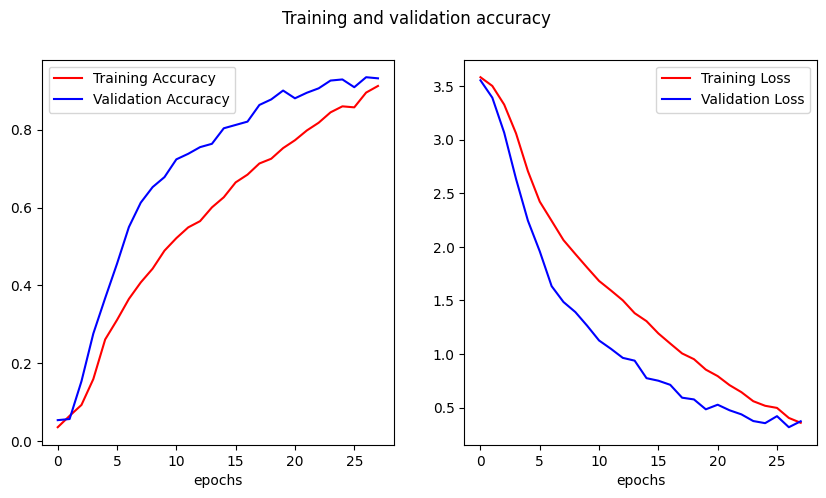

In [ ]:
# Get training and validation accuracy from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [104]:
custom_model.save("C:/Users/Imtiaz/Downloads/Compressed/Fruit Classification/custom_cnn_93%.h5")

## Model Prediction On Any Image

1/1 [==============================] - 0s 82ms/step


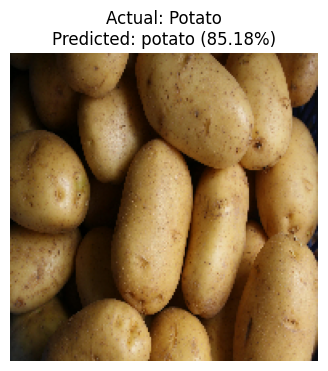

In [107]:
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model("C:/Users/Imtiaz/Downloads/Compressed/Fruit Classification/custom_cnn_93%.h5")

image = 'potato1.jpeg' # image directotry 
image = tf.keras.utils.load_img(image, target_size=(192,192))
img_array = tf.keras.utils.img_to_array(image)
img_batch = tf.expand_dims(img_array, 0)
prediction = model.predict(img_batch)

class_names = train_dataset.class_names

score = tf.nn.softmax(prediction[0])
predicted_class = class_names[np.argmax(score)]
accuracy = np.max(score) * 100

# Plot the image with actual and predicted labels
actual_label = "Potato" 
plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.title(f"Actual: {actual_label}\nPredicted: {predicted_class} ({accuracy:.2f}%)")
plt.axis('off')
plt.show()


## Web-Interface Interface With Deployed Model

In [124]:
from tensorflow.keras.preprocessing import image
import gradio as gr

# Load the pre-trained model
model = tf.keras.models.load_model("C:/Users/Imtiaz/Downloads/Compressed/Fruit Classification/custom_cnn_93%.h5")

# Class Names
class_map = [
    'apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower',
    'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi',
    'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple',
    'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato',
    'turnip', 'watermelon']

def prediction(test_image):
    """Make a prediction using the loaded model and show the result."""
 
    # Load and prepare the image
    test_img = image.load_img(test_image, target_size=(192, 192)) 
    test_img_array = image.img_to_array(test_img)
    test_img_batch = tf.expand_dims(test_img_array, 0)

    # Make Prediction 
    prediction = model.predict(test_img_batch)
    score = tf.nn.softmax(prediction[0])
    predicted_class = class_map[np.argmax(score)]
    confidence = np.max(score)*100
    return f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}%"

sample_images= ['Apple.jpg','corn.jpg','potato1.jpeg','Tomato.jpg','Banana.jpg']

# Gradio interface
interface = gr.Interface(
    fn=prediction, 
    inputs=gr.Image(type="filepath"),
    outputs="text", 
    title="Vegetable & Fruit Classifer",
    examples=sample_images,
    description="Upload image of any vegetable or furit to classify.\n\n ![Vegetable GIF](https://media.giphy.com/media/LrY6OiICHS1TWZpGkf/giphy.gif)"
)
interface.launch()

Running on local URL:  http://127.0.0.1:7874

To create a public link, set `share=True` in `launch()`.
